In [5]:
import numpy as np
import graphlearning as gl
from scipy.spatial.distance import cdist

from utils import estimate_epsilon

import matplotlib.pyplot as plt
import pylab
from plotting import plot_graph_function_with_triangulation

In [6]:
sample = [200, 1000, 4000]

X = np.random.uniform([0,0], [1, 1], size=(max(sample), 2))
X = np.concatenate([[[0.3, 0.5], [0.7, 0.5]], X])
y = np.array([0, 1])

In [9]:
results = {}
for n in sample:
    eps = estimate_epsilon(n, d=2)
    W = gl.weightmatrix.epsilon_ball(X[:n], epsilon=eps)

    laplace = gl.ssl.laplace(W, tol=1e-10)
    u = laplace.fit(train_ind=[0,1], train_labels=y)[:, 1]
    results[n] = u

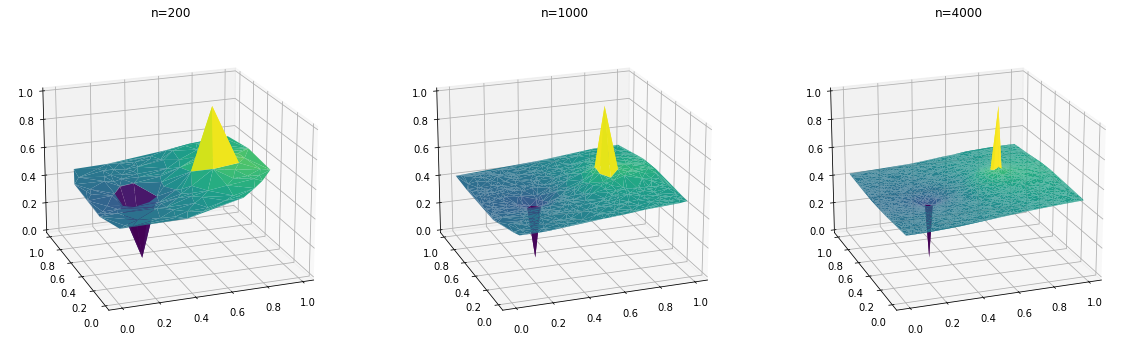

In [10]:
MAX_PLOTTING_POINTS = 5000

cm = pylab.get_cmap('Greys')
def update_colors(ax):
    lines = ax.lines
    colors = cm(np.linspace(0, 1, len(lines)))
    for line, c in zip(lines, colors):
        line.set_color(c)

fig = plt.figure(figsize=(20, 8))
for i, (n, u) in enumerate(results.items(), start=1):
    sample_size = min(n, MAX_PLOTTING_POINTS)
    sample_values = np.random.choice(np.arange(2, n), size=sample_size-2)
    sample_values = np.concatenate([[0, 1], sample_values])
    dist = cdist(X[sample_values], X[sample_values], metric="euclidean")

    ax = fig.add_subplot(1, len(results), i, projection="3d")
    plot_graph_function_with_triangulation(ax, X[sample_values], u[sample_values], dist=dist, max_dist=0.4)
    ax.set_zlim(0, 1)
    ax.set_title(f"n={n}")

fig.savefig(f"../plots/laplace_spikes_demo.png", bbox_inches="tight")